In [1]:
import os
import re

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("data/zeolite/ZEOSYN.xlsx")

In [3]:
df.shape

(30164, 100)

In [4]:
df2 = pd.read_parquet("~/Downloads/Zeolite.parquet")
df2.head()

,journal,publisher,open_access,xml,pdf,doi,title
doi,,,,,,,
10.1002/1521-3765(20021004)8:19<4549::aid-chem4549>3.0.co;2-z,Chemistry - A European Journal,Wiley,False,False,False,10.1002/1521-3765(20021004)8:19<4549::aid-chem...,None
10.1002/anie.200250076,Angewandte Chemie International Edition,Wiley,False,False,True,10.1002/anie.200250076,None
10.1002/anie.200250351,Angewandte Chemie International Edition,Wiley,False,False,True,10.1002/anie.200250351,None
10.1002/anie.200290028,Angewandte Chemie International Edition,Wiley,False,False,True,10.1002/anie.200290028,None
10.1002/anie.200390304,Angewandte Chemie International Edition,Wiley,False,False,True,10.1002/anie.200390304,None


In [5]:
df2["publisher"].value_counts()

publisher
Elsevier BV                                                   1678
American Chemical Society (ACS)                                373
Wiley                                                          353
Royal Society of Chemistry (RSC)                               322
Springer Science and Business Media LLC                        314
American Association for the Advancement of Science (AAAS)       9
International Union of Crystallography (IUCr)                    8
Cellule MathDoc/Centre Mersenne                                  6
Oxford University Press (OUP)                                    3
Walter de Gruyter GmbH                                           3
IOP Publishing                                                   2
Proceedings of the National Academy of Sciences                  2
Science Alert                                                    1
Danish Chemical Society                                          1
The Royal Society                                   

In [6]:
merged_df = df.merge(df2.drop(columns="doi"), on="doi")
merged_df[merged_df["publisher"] == "Elsevier BV"].shape

(11290, 106)

In [7]:
len(df2["doi"].unique())

3122

In [8]:
df2[df2["publisher"] == "Springer Science and Business Media LLC"]

,journal,publisher,open_access,xml,pdf,doi,title
doi,,,,,,,
10.1007/978-3-662-47395-5_5,Green Chemistry and Sustainable Technology,Springer Science and Business Media LLC,False,True,False,10.1007/978-3-662-47395-5_5,None
10.1007/bf01042779,Journal of Inclusion Phenomena and Molecular R...,Springer Science and Business Media LLC,False,True,False,10.1007/bf01042779,None
10.1007/s10562-005-2128-2,Catalysis Letters,Springer Science and Business Media LLC,False,True,False,10.1007/s10562-005-2128-2,None
10.1007/s10562-006-0070-6,Catalysis Letters,Springer Science and Business Media LLC,False,True,False,10.1007/s10562-006-0070-6,None
10.1007/s10562-015-1683-4,Catalysis Letters,Springer Science and Business Media LLC,False,True,False,10.1007/s10562-015-1683-4,None
...,...,...,...,...,...,...,...
10.1557/proc-111-147,MRS Proceedings,Springer Science and Business Media LLC,False,True,False,10.1557/proc-111-147,None
10.1038/s41467-019-12394-0,Nature Communications,Springer Science and Business Media LLC,False,True,False,10.1038/s41467-019-12394-0,None
10.1038/nature00924,Nature,Springer Science and Business Media LLC,False,True,False,10.1038/nature00924,None


In [9]:
len(df2)

3122

In [10]:
element_columns =  ['Si',
 'Al',
 'P',
 'Na',
 'K',
 'Li',
 'Sr',
 'Rb',
 'Cs',
 'Ba',
 'Ca',
 'F',
 'Ge',
 'Ti',
 'In',
 'B',
 'Mg',
 'Ga',
 'Ni',
 'Mn',
 'Fe',
 'Co',
 'Cr',
 'Zn',
 'Nb',
 'Be',
 'W',
 'Ce',
 'Cu',
 'Sn',
 'Gd',
 'La',
 'Y',
 'Dy',
 'Sm',
 'Ag',
 'Cd',
 'Zr',
 'V',
 'Ta',
 'Ru',
 'Hf',
 'Yb',
 'Tl',
 'As']

element_df = df[element_columns].fillna(0.0)
element_df

,Si,Al,P,Na,K,Li,Sr,Rb,Cs,Ba,...,Ag,Cd,Zr,V,Ta,Ru,Hf,Yb,Tl,As
0,0.030769,0.000000,0.0,0.0,0.001538,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.105263,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021959,0.000000,0.0,0.0,0.002635,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.046512,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30159,0.967742,0.032258,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30160,0.975610,0.024390,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30161,0.985915,0.014085,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30162,0.990099,0.009901,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pca = PCA(n_components=5)
pca.fit(element_df.values)

PCA(n_components=5)

<Axes: >

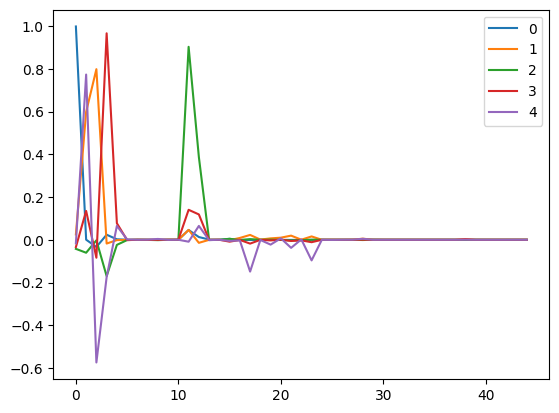

In [12]:
pd.DataFrame(pca.components_.T).plot()

In [13]:
pca.explained_variance_ratio_

array([0.75303185, 0.12469247, 0.04271143, 0.02297392, 0.01717515])

In [14]:
column_scores = pca.components_.sum(axis=0)
top_column_indices = np.abs(column_scores).argsort()[::-1]
top_columns = [element_df.columns[i] for i in top_column_indices]
for i in top_column_indices:
    col_name = element_df.columns[i]
    col_value = column_scores[i]
    print(col_name, col_value)

Al 1.4464805602276023
F 1.1263694593830984
Si 0.9304719707716803
Na 0.6276199386816925
Ge 0.5692353030663011
Ga -0.1417712526235057
K 0.11942698921521297
P 0.10419222221925217
Zn -0.09225382129397773
Co -0.027515280033084757
Mn -0.018646062082916522
Fe 0.016527086937842682
Cu 0.008968642640190165
B -0.006901132736804073
V 0.0031641167653415872
Mg 0.0030047310470659003
Cr -0.002795254012309202
Ti -0.002253565111464563
Cs 0.0015463075642431598
Li -0.0011820461084784187
Ce 0.0007414982206885696
Be -0.0007198786560198695
Ni -0.0005774476773539352
Ca 0.0003678550950426796
Sn 0.0003216234859866839
Ba -0.00022695909924015992
Rb -0.00021985988706087634
Tl 9.292647043639631e-05
As -2.0678167906108323e-05
Ta 1.967567805346024e-05
In -1.3491049920787763e-05
Zr 7.315661928072945e-06
Sr 5.443380785589565e-06
La -3.098672587000389e-06
Nb 2.659907130320078e-06
Ru 2.1530462489384634e-06
W -1.2964302348046578e-06
Hf 1.0325317511012515e-06
Ag -3.476919538931749e-07
Gd -2.281515016966068e-07
Cd -6.937862

In [15]:
columns_to_keep = 5

to_keep = top_columns[:columns_to_keep]
to_drop = top_columns[columns_to_keep:]

print(f"Keeping: {to_keep}")
print(f"Dropping: {to_drop}")

element_zero_filter = np.full(len(element_df), True)

for column in to_drop:
    element_zero_filter &= element_df[column] == 0

element_zero_filter.sum()

Keeping: ['Al', 'F', 'Si', 'Na', 'Ge']
Dropping: ['Ga', 'K', 'P', 'Zn', 'Co', 'Mn', 'Fe', 'Cu', 'B', 'V', 'Mg', 'Cr', 'Ti', 'Cs', 'Li', 'Ce', 'Be', 'Ni', 'Ca', 'Sn', 'Ba', 'Rb', 'Tl', 'As', 'Ta', 'In', 'Zr', 'Sr', 'La', 'Nb', 'Ru', 'W', 'Hf', 'Ag', 'Gd', 'Cd', 'Yb', 'Dy', 'Y', 'Sm']


np.int64(19615)

In [16]:
(df[element_zero_filter]["Ca"].fillna(0) == 0).all()

np.True_

In [17]:
meta_columns = ["doi", "normed", "Notes", "title", "abstract_keywords", "recipe_keywords", "year"]

In [18]:
potential_columns_to_predict = [column for column in df.columns if
  (column not in to_drop)
  and (column not in meta_columns)
  and not (any([keyword in column for keyword in ["synonyms", "iupac", "smiles", "formula", "Code", "Si/Al", "Unnamed"]]))
]
potential_columns_to_predict

['Si',
 'Al',
 'Na',
 'F',
 'Ge',
 'H2O',
 'solvent',
 'sda1',
 'sda2',
 'sda3',
 'acid',
 'seed',
 'OH',
 'aging_time',
 'aging_temp',
 'cryst_time',
 'cryst_temp',
 'rotation',
 'Seed_type',
 'react_vol',
 'pH',
 'osda1',
 'osda2',
 'osda3',
 'product1',
 'product2',
 'product3',
 'precursors',
 'brands',
 'yield',
 'percent cryst',
 'crystal size',
 'micropore volume',
 'micropore diameter',
 'bet area',
 'external surface area']

In [19]:
len(potential_columns_to_predict)

36

In [20]:
df[potential_columns_to_predict].isna().mean().sort_values()

Si                       0.205642
OH                       0.205642
acid                     0.205642
sda3                     0.205642
sda1                     0.205642
solvent                  0.205642
sda2                     0.205642
Ge                       0.205642
F                        0.205642
Na                       0.205642
Al                       0.205642
H2O                      0.205642
product1                 0.206836
cryst_temp               0.224605
precursors               0.255503
cryst_time               0.256465
osda1                    0.287130
rotation                 0.504708
brands                   0.560900
react_vol                0.610463
aging_time               0.646897
pH                       0.751591
percent cryst            0.788357
seed                     0.789617
yield                    0.797441
crystal size             0.798402
product2                 0.798601
bet area                 0.801319
micropore volume         0.807552
external surfa

In [21]:
columns_to_predict = [
  "Si",
  "Ge",
  "F",
  "Na",
  "Al",
  "H2O",
  "OH",
  "precursors",
  "acid",
  "sda1",
  "sda2",
  "sda3",
  "solvent",
  "cryst_temp",
  "cryst_time",
  "osda1",
  "osda2",
  "osda3",
  "product1",
  "product2",
  "product3",
]

len(columns_to_predict)

21

In [22]:
(df[element_zero_filter][to_keep].fillna(0) != 0).sum(axis=0)

Al     8402
F      4014
Si    12749
Na     6477
Ge     2125
dtype: int64

In [23]:
len(df[element_zero_filter]["doi"].dropna().unique())

1817

In [24]:
## all papers in the original dataset
merged_df.groupby("publisher")["doi"].nunique().sort_values(ascending=False)

publisher
Elsevier BV                                                   1678
American Chemical Society (ACS)                                373
Wiley                                                          353
Royal Society of Chemistry (RSC)                               322
Springer Science and Business Media LLC                        314
American Association for the Advancement of Science (AAAS)       9
International Union of Crystallography (IUCr)                    8
Cellule MathDoc/Centre Mersenne                                  6
Oxford University Press (OUP)                                    3
Walter de Gruyter GmbH                                           3
IOP Publishing                                                   2
Proceedings of the National Academy of Sciences                  2
Informa UK Limited                                               1
Institute of Organic Chemistry & Biochemistry                    1
Danish Chemical Society                             

In [25]:
merged_df[element_zero_filter].groupby("publisher")["doi"].nunique().sort_values(ascending=False)

/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_7036/1933036070.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[element_zero_filter].groupby("publisher")["doi"].nunique().sort_values(ascending=False)


publisher
Elsevier BV                                                   1402
American Chemical Society (ACS)                                290
Royal Society of Chemistry (RSC)                               284
Wiley                                                          255
Springer Science and Business Media LLC                        245
American Association for the Advancement of Science (AAAS)       9
International Union of Crystallography (IUCr)                    8
Cellule MathDoc/Centre Mersenne                                  6
Oxford University Press (OUP)                                    3
Walter de Gruyter GmbH                                           3
IOP Publishing                                                   2
Proceedings of the National Academy of Sciences                  2
Informa UK Limited                                               1
Institute of Organic Chemistry & Biochemistry                    1
Danish Chemical Society                             

In [26]:
sampled_dois = []

rng = np.random.default_rng(seed=8675309)

for publisher in ["Elsevier BV", "Springer Science and Business Media LLC", "Wiley"]:
    sampled_dois.extend(rng.choice(merged_df[element_zero_filter & (merged_df["publisher"] == publisher)]["doi"].unique(), 100, replace=False))

/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_7036/3217429788.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sampled_dois.extend(rng.choice(merged_df[element_zero_filter & (merged_df["publisher"] == publisher)]["doi"].unique(), 100, replace=False))
/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_7036/3217429788.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sampled_dois.extend(rng.choice(merged_df[element_zero_filter & (merged_df["publisher"] == publisher)]["doi"].unique(), 100, replace=False))
/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_7036/3217429788.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sampled_dois.extend(rng.choice(merged_df[element_zero_filter & (merged_df["publisher"] == publisher)]["doi"].unique(), 100, replace=False))


In [27]:
len(sampled_dois)

300

In [28]:
sampled_dois

['10.1016/j.micromeso.2008.04.010',
 '10.1016/j.micromeso.2015.11.014',
 '10.1016/j.matlet.2012.07.079',
 '10.1016/j.jhazmat.2017.07.019',
 '10.1016/0927-6513(95)00084-4',
 '10.1016/j.apcatb.2016.10.039',
 '10.1016/j.memsci.2018.07.024',
 '10.1016/0926-860x(92)80258-e',
 '10.1016/j.cattod.2019.03.038',
 '10.1016/j.jcis.2013.11.065',
 '10.1016/s0166-9834(00)83137-1',
 '10.1016/j.micromeso.2009.05.013',
 '10.1016/j.cherd.2015.11.014',
 '10.1016/j.carbon.2005.08.010',
 '10.1016/j.ces.2012.01.024',
 '10.1016/j.jcat.2009.06.016',
 '10.1016/j.fuel.2019.04.079',
 '10.1016/j.micromeso.2006.04.001',
 '10.1016/j.cattod.2018.04.026',
 '10.1016/s0167-2738(02)00723-3',
 '10.1016/s0927-6513(97)00024-2',
 '10.1016/j.catcom.2009.07.008',
 '10.1016/s1387-1811(97)00027-9',
 '10.1016/j.micromeso.2018.04.033',
 '10.1016/j.jcat.2015.09.006',
 '10.1016/j.jallcom.2018.03.232',
 '10.1016/j.catcom.2017.08.010',
 '10.1016/j.micromeso.2012.06.035',
 '10.1016/j.micromeso.2011.02.019',
 '10.1016/j.cattod.2014.06.0

In [29]:
final_df = df[df["doi"].isin(sampled_dois)][meta_columns + columns_to_predict]
final_df.sample(10)

,doi,normed,Notes,title,abstract_keywords,recipe_keywords,year,Si,Ge,F,...,sda3,solvent,cryst_temp,cryst_time,osda1,osda2,osda3,product1,product2,product3
174,10.1002/anie.201404076,yes,NaN,NaN,NaN,NaN,2014.0,0.062500,0.0,0.031250,...,0.0,0.0,160.0,44.0,CCc1n(C)cc[n+]1C,NaN,NaN,ITW,NaN,NaN
13380,10.1007/s11164-016-2550-7,yes,NaN,In situ ultrasonic measurements: a powerful to...,"['situ ultrasonic diagnostic technique', 'ex s...","['generates ultrasound waves via', 'attenuatio...",2016.0,0.013736,0.0,0.000000,...,0.0,0.0,95.0,7.5,tetramethylammonium,NaN,NaN,zeolite A,NaN,NaN
13263,10.1007/s11144-012-0520-7,yes,NaN,NaN,NaN,NaN,2013.0,0.002978,0.0,0.000000,...,0.0,0.0,NaN,NaN,morpholine,NaN,NaN,SAPO-18,SAPO-34,NaN
8890,10.1016/j.apcatb.2017.05.082,yes,NaN,NaN,NaN,NaN,2017.0,0.147783,0.0,0.000000,...,0.0,0.0,175.0,240.0,"4,4,10,10-tetraethyl-1,14-dimethyl-4,10-diazon...",NaN,NaN,FAU,NaN,NaN
21127,10.1016/j.micromeso.2016.09.002,yes,0,NaN,NaN,NaN,2016.0,0.031037,0.0,0.015518,...,0.0,0.0,180.0,24.0,1-butyl-3-methyl-imidazolium,NaN,NaN,TON,NaN,NaN
634,10.1002/cssc.201800864,yes,NaN,NaN,NaN,NaN,2018.0,0.004815,0.0,0.000000,...,0.0,0.0,180.0,18.0,tetraethylammonium,NaN,NaN,SAPO-34,NaN,NaN
13006,10.1007/s10934-010-9385-1,yes,microwave,NaN,NaN,NaN,2011.0,0.004959,0.0,0.000000,...,0.0,0.0,180.0,2.0,tetraethylammonium,NaN,NaN,SAPO-34,NaN,NaN
22435,10.1002/anie.201504416,yes,NaN,NaN,NaN,NaN,2015.0,0.008696,0.0,0.000000,...,0.0,0.0,160.0,288.0,tris(2‐hydroxyethyl)methylammonium,NaN,NaN,ECR-40A,NaN,NaN
24036,10.1016/j.jcrysgro.2010.10.163,yes,NaN,Influence of starting zeolite on synthesis of ...,NaN,NaN,2011.0,0.156018,0.0,0.000000,...,0.0,0.0,170.0,168.0,tetramethylammonium,NaN,NaN,amorphous,NaN,NaN
22923,10.1007/s10934-006-9069-z,yes,NaN,NaN,NaN,NaN,2007.0,0.021510,0.0,0.000000,...,0.0,0.0,170.0,168.0,"6-azonia-spiro-[5,5]-undecane",NaN,NaN,MTW,NaN,NaN


array([[<Axes: title={'center': 'Rows per DOI'}>]], dtype=object)

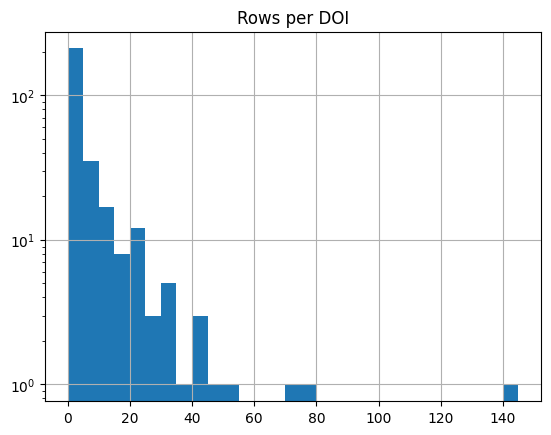

In [30]:
final_df.groupby(["doi"])[["Si"]].count().rename(columns={"Si": "Rows per DOI"}).hist(bins=range(0,150, 5), log=True)